In [1]:
using Plots
using LinearAlgebra
using DifferentialEquations
using Random

In [2]:
include("lorentz_system.jl")

LorentzSystem (generic function with 2 methods)

In [3]:
function Correlation(vec1,vec2)
    return sum(vec1.*vec2)/norm(vec1)/norm(vec2)
end

Correlation (generic function with 1 method)

In [4]:
function Plot_Correlation_Histogram2d(Δt1,Δt2, time,x̄₀,nr_of_initial_vals,p,solver1,solver2)
    correlations=zeros(nr_of_initial_vals,nr_of_initial_vals)
    for m = 1:nr_of_initial_vals
        for n = 1:nr_of_initial_vals
            
            x̄ = x̄₀+[m*2-nr_of_initial_vals*2/2;n*2-nr_of_initial_vals*2/2;0]
            tsteps = Int(time/Δt1)
            prob = ODEProblem(LorentzSystem,x̄,(0.0,time),p)
            sol1 = solve(prob, solver1,adaptive=false, dt=Δt1)
            sol2 = solve(prob, solver2,adaptive=false, dt=Δt2)

            correlation = 1
            i=1
            while correlation > 0.5 && i<tsteps
                correlation = Correlation(sol1.u[i,1],sol2.u[i*Integer(Δt1/Δt2),1])
                i+=1
            end

            correlations[m,n] = i*Δt
            
        end
    end

    return correlations
    #surface((x̄₀[1]-nr_of_initial_vals/2):(x̄₀[1]+nr_of_initial_vals/2)-1,(x̄₀[2]-nr_of_initial_vals/2):(x̄₀[2]+nr_of_initial_vals/2)-1,correlations)
end

Plot_Correlation_Histogram2d (generic function with 1 method)

In [5]:
function Plot_Correlation(Δt1,Δt2,time,x̄,p,solver1,solver2)
    
    plt=plot()
    tsteps = Int(time/Δt1)
    prob = ODEProblem(LorentzSystem,x̄,(0.0,time),p)
    sol1 = solve(prob,solver1,adaptive=false, dt=Δt1)
    sol2 = solve(prob,solver2,adaptive=false, dt=Δt2)

    correlation = zeros(tsteps)
    for i=1:tsteps
        correlation[i] = Correlation(sol1.u[i,1],sol2.u[2*i,1])
    end

    plot(plt,range(0,stop=time-Δt,step=Δt),correlation,label="x₀ = $x̄₀")

end

Plot_Correlation (generic function with 1 method)

In [6]:
## parameter values
θ = 10.0; β = 8/3; μ = 28
p=[θ,μ,β]
time = 100
Δt = 0.005
# initial values
x̄₀ = [sqrt(8*22.5/3);
      sqrt(8*22.5/3);
      22.5]

nr=150
initial_vals = zeros(3,nr)
for i=1:nr
    initial_vals[:,i] = x̄₀ + [0; 0;-100+i]
end


In [7]:
correlations=Plot_Correlation_Histogram2d(Δt,Δt/2,time,x̄₀,60,p,Rodas5(),Rodas5())

60×60 Matrix{Float64}:
 17.995  18.49   21.02   24.76   28.775  …  14.095  16.975  16.52   15.44
 17.98   19.305  20.975  24.355  34.945     21.555  19.83   15.74   15.875
 18.835  20.325  24.55   29.67   29.015     24.78   18.945  21.625  18.28
 18.835  21.865  26.465  33.335  27.585     21.025  21.21   28.06   21.61
 18.08   23.7    27.985  29.85   23.455     14.575   9.67   16.52   22.56
 21.65   25.075  31.49   25.38   22.82   …  16.935  21.04   21.08   17.935
 21.575  26.185  29.125  24.67   21.945     19.665  20.515  19.655  18.24
 24.55   28.38   24.89   22.585  17.125     19.655  19.885  17.65   14.985
 23.675  26.455  22.385  20.59   19.355     22.345  19.195  17.32   14.735
 28.755  22.95   21.815  19.985  19.305     18.4    19.105  17.345  12.025
  ⋮                                      ⋱                          
 17.045  16.285  16.57   13.185  14.52      15.73   10.4    17.345  18.665
 18.21   14.89   15.24   14.54   15.125     16.005  18.915  16.78   19.255
 18.925  16.4

In [8]:
nr_of_initial_vals=60
heatmap((x̄₀[1]-nr_of_initial_vals*4/2):4:(x̄₀[1]+nr_of_initial_vals*4/2-1),(x̄₀[2]-nr_of_initial_vals*4/2):4:(x̄₀[2]+nr_of_initial_vals*4/2-1),correlations,xlabel="x", ylabel="y", zlabel="correlation time", seriestype=:bar,dpi=300)
savefig("plots/correlation_rodas_005_rodas_0025_bigger_110x110.png")

"/Users/00eila01/01_Arbete/UTBILDNING/KEXET/Numerical-Solutions-and-Parameter-Sensitivity-of-the-Lorentz-System-Degree-Project-in-Technology/Numerical-Solvers/plots/correlation_rodas_005_rodas_0025_bigger_110x110.png"

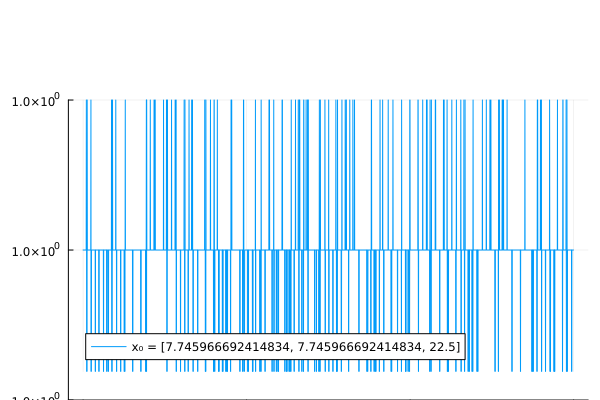

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/00eila01/.julia/packages/PlotUtils/M092a/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/00eila01/.julia/packages/PlotUtils/M092a/src/ticks.jl:191
GKS: Possible loss of precision in routine SET_WINDOW
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/00eila01/.julia/packages/PlotUtils/M092a/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/00eila01/.julia/packages/PlotUtils/M092a/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/00eila01/.julia/packages/PlotUtils/M092a/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/00eila01/.julia/packages/PlotUtils/M092a/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/00eila01/.julia/packages/PlotUtils/M092a/src/ticks.jl:191


In [95]:
Plot_Correlation(Δt,Δt/2,30,[0,0,22.5],p,RadauIIA5(),RadauIIA5())

In [92]:
prob = ODEProblem(LorentzSystem,[0,0,22.5],(0.0,30),p)
sol1 = solve(prob,RadauIIA5(),adaptive=false, dt=Δt)
sol2 = solve(prob,RadauIIA5(),adaptive=false, dt=Δt/2)

retcode: Success
Interpolation: 3rd order Hermite
t: 6002-element Vector{Float64}:
  0.0
  0.005
  0.01
  0.015
  0.02
  0.025
  0.030000000000000002
  0.035
  0.04
  0.045
  ⋮
 29.964999999998323
 29.969999999998322
 29.97499999999832
 29.97999999999832
 29.98499999999832
 29.989999999998318
 29.994999999998317
 29.999999999998316
 30.0
u: 6002-element Vector{Vector{Float64}}:
 [0.0, 0.0, 22.5]
 [0.0, 0.0, 22.20199114066192]
 [0.0, 0.0, 21.907929360445795]
 [0.0, 0.0, 21.61776238092732]
 [0.0, 0.0, 21.331438616101465]
 [0.0, 0.0, 21.04890716321148]
 [0.0, 0.0, 20.770117793699402]
 [0.0, 0.0, 20.495020944276384]
 [0.0, 0.0, 20.223567708111325]
 [0.0, 0.0, 19.955709826136186]
 ⋮
 [0.0, 0.0, 4.458185320158e-34]
 [0.0, 0.0, 4.3991373769589756e-34]
 [0.0, 0.0, 4.34087151421324e-34]
 [0.0, 0.0, 4.2833773733917355e-34]
 [0.0, 0.0, 4.226644733162446e-34]
 [0.0, 0.0, 4.170663507573245e-34]
 [0.0, 0.0, 4.115423744258807e-34]
 [0.0, 0.0, 4.060915622671277e-34]
 [0.0, 0.0, 4.060915622653041e-34]

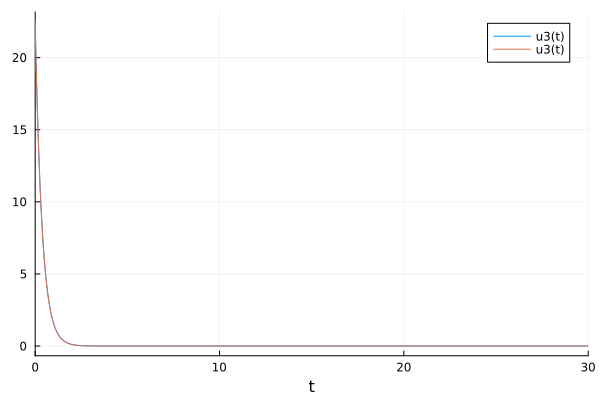

In [93]:
plot(sol1,idxs=(3))
plot!(sol2,idxs=(3))